1.43232323232


X:
[[-0.35353535  1.        ]
 [-0.63636364  1.        ]
 [-0.93939394  1.        ]
 [ 0.93939394  1.        ]
 [-0.6969697   1.        ]
 [-0.09090909  1.        ]
 [ 0.37373737  1.        ]
 [ 0.07070707  1.        ]
 [-0.5959596   1.        ]
 [ 0.45454545  1.        ]]
Y:
[[ 0.95959596]
 [ 1.32727273]
 [ 1.72121212]
 [-0.72121212]
 [ 1.40606061]
 [ 0.61818182]
 [ 0.01414141]
 [ 0.40808081]
 [ 1.27474747]
 [-0.09090909]]
cov
[[ 12.65119206  -4.91582492]
 [ -4.91582492  34.33333333]]
mean
[[-1.19718133]
 [ 0.5001584 ]]


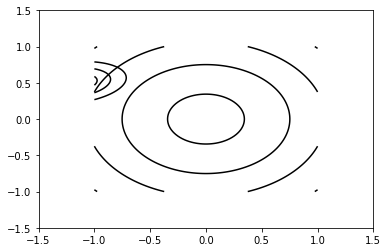

In [749]:
import pylab as py
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal
import numpy.random
from numpy.linalg import inv

#global variables
random_xs = []
y_values = []
w = [-1.3, 0.5]

#Define prior assumptions
identity_matrix = np.identity(2)
prior_w_mean = np.array([0,0])
prior_w_cov = identity_matrix
prior_w = multivariate_normal(prior_w_mean.flatten(), prior_w_cov)

#Plot contour
x = np.linspace(-1, 1, 100)
x1p, x2p = np.meshgrid(x,x)
x1p_flat = x1p.flatten()
x2p_flat = x2p.flatten()
pos = np.vstack((x1p_flat, x2p_flat))
pos = pos.T
Z = prior_w.pdf(pos)
Z = Z.reshape(100,100)
fig = plt.figure()
ax = fig.add_subplot(111)
prior_w_contour = ax.contour(x1p, x2p, Z, 3, colors='k')

#Generate x and y values
def get_random_xs(n):
    for i in range(0, n):
        index = np.random.randint(0, len(x)-1)
        while x[index] in random_xs:
            index = np.random.randint(1, len(x)-1)
        random_x = x[index]
        random_xs.append(random_x)
    return random_xs

def generate_y_value(random_xs):
    for x in random_xs:
        y = x*w[0] + w[1]
        y_values.append(y)
    Y = np.array([y_values])
    Y = Y.T
    return Y

#Turn random_xs into matrix with ones
def generate_x_and_ones_matrix(random_xs):
    arr_x = np.array([random_xs])
    arr_x = arr_x.T
    ones = np.array([np.ones(len(random_xs))])
    ones = ones.T
    x_and_ones = np.concatenate((arr_x, ones), axis=1)
    return x_and_ones

#Generate an x and turn into (1,2) matrix  
xs = get_random_xs(10)
X = generate_x_and_ones_matrix(xs)
print("X:")
print(X)
Y = generate_y_value(xs)
print("Y:")
print(Y)

#Calculate posterior (formulas from GaussianIDentities.pdf end of page 4)
posterior_cov = (1/(0.3))*np.dot(X.T, X) + inv(identity_matrix)  #0.3 or 0.3**2?
posterior_mean = (1/(0.3))*np.dot(inv(posterior_cov), np.dot(X.T, Y))
print("cov")
print(posterior_cov)
print("mean")
print(posterior_mean)
posterior_w = multivariate_normal(posterior_mean.flatten(), inv(posterior_cov))

#Plot contour for posterior of w given single random datapoint
Z_posterior = posterior_w.pdf(pos)
Z_posterior = Z_posterior.reshape(100,100)
posterior_w_contour = ax.contour(x1p, x2p, Z_posterior, 3, colors='k')


#plt.scatter(random_x, y, color='g')
#y = x[:]*w[0] + w[1] + e[:,0]
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()